In [2]:
%store -r __importData
import pandas as pd
import numpy as np
import ggplot as gplt
from sklearn.preprocessing import LabelEncoder
#from feature_extraction import AirlineFeature
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold


# the target value column of input must be kept
def mean_encoder(input_table, y, columns, target, cv):
    input_table[target] = y
    table = input_table.copy()
    prior = table[target].mean()
    new_col = {}
    for col in columns:
        colname = col + "_mean_target"
        table[colname] = ""
        new_col[colname] = prior
    for tr_ind, val_ind in cv.split(y, y):
        x_tr, x_val = input_table.iloc[tr_ind], input_table.iloc[val_ind]
        for col in columns:
            colname = col + "_mean_target"
            means = x_val[col].map(x_tr.groupby(col)[target].mean())
            x_val[colname] = means
        table.iloc[val_ind] = x_val
    table.fillna(new_col, inplace=True)
    input_table.drop(columns=[target], inplace=True)
    return table

def test_set_encoder(train_set, train_y, test_set, columns, target):
    new_test = test_set.copy()
    train_set[target] = train_y
    prior = train_set[target].mean()
    new_col = {}
    for col in columns:
        colname = col + "_mean_target"
        means = new_test[col].map(train_set.groupby(col)[target].mean())
        new_test[colname] = means
        new_col[colname] = prior
    new_test.fillna(new_col, inplace=True)
    train_set.drop(columns=[target], inplace=True)
    return new_test

In [4]:
__importData

import group_table


C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


import airline_table


C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


import order_table
import train_set
import test_set


In [12]:
tmp_airline = airline_table[["group_id", "src_airport", "dst_airport"]]
tmp_order = pd.merge(train_set, order_table, on="order_id", how="left")
tmp_order = tmp_order[["order_id", "deal_or_not", "group_id"]]
tmp_airline = pd.merge(tmp_order, tmp_airline, on="group_id", how="left")

In [16]:
cv = StratifiedKFold(5, shuffle=True, random_state=104702016)
tmp_airline_me = mean_encoder(tmp_airline, tmp_airline["deal_or_not"], ["src_airport", "dst_airport"], "deal_or_not", cv)

C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


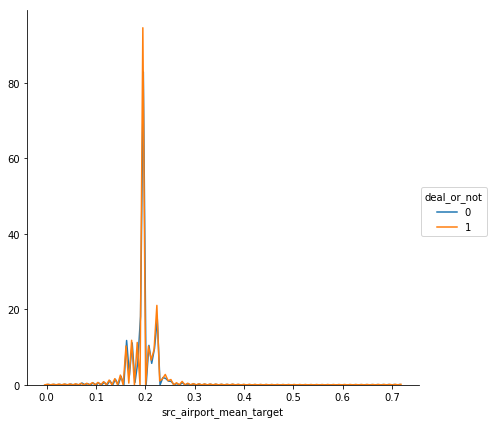

In [18]:
sns.FacetGrid(tmp_airline_me, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "src_airport_mean_target") \
   .add_legend()

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


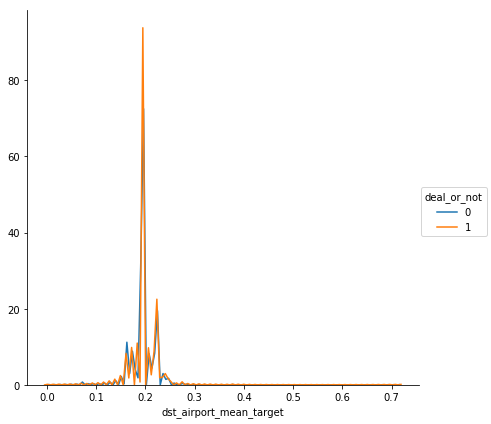

In [21]:
sns.FacetGrid(tmp_airline_me, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "dst_airport_mean_target") \
   .add_legend()

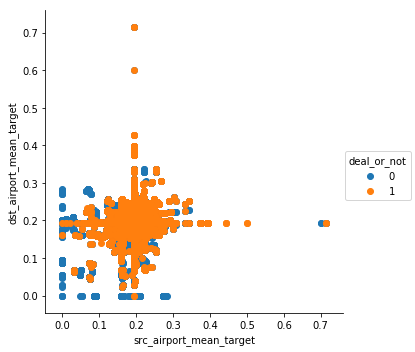

In [22]:
sns.FacetGrid(tmp_airline_me, hue="deal_or_not", size=5) \
   .map(plt.scatter, "src_airport_mean_target", "dst_airport_mean_target") \
   .add_legend()

In [59]:
airport_me = tmp_airline_me.groupby("order_id", as_index=False).agg({"src_airport_mean_target": {
                                                            "src_mean_target_avg": "mean",
                                                            "src_mean_target_std": "std",
                                                            "src_mean_target_min": "min",
                                                            "src_mean_target_max": "max"},
                                                     "dst_airport_mean_target": {
                                                            "dst_mean_target_avg": "mean",
                                                            "dst_mean_target_std": "std",
                                                            "dst_mean_target_min": "min",
                                                            "dst_mean_target_max": "max"}})

C:\Users\S\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [60]:
airport_me.columns = [x[1] for x in airport_me.columns.values]
airport_me.rename({"": "order_id"}, axis="columns", inplace=True)

In [61]:
airport_me = pd.merge(tmp_order, airport_me, on="order_id", how="left")

In [66]:
airport_me.drop(columns=["deal_or_not", "group_id"]).to_csv("airport_mean_encoding.csv", encoding="utf-8", index=False)

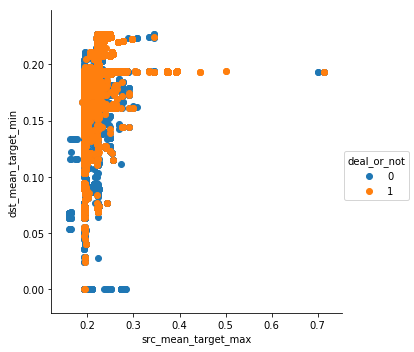

In [65]:
sns.FacetGrid(airport_me, hue="deal_or_not", size=5) \
   .map(plt.scatter, "src_mean_target_max", "dst_mean_target_min") \
   .add_legend()

In [70]:
def airport_process(table):
    airline_table = table[0].copy()
    train_set = table[1].copy()
    test_set = table[2].copy()
    order_table = table[3].copy()
    tmp_airline = airline_table[["group_id", "src_airport", "dst_airport"]]
    tmp_airline = airline_table[["group_id", "src_airport", "dst_airport"]]
    tmp_train = pd.merge(train_set, order_table, on="order_id", how="left")
    tmp_train = tmp_train[["order_id", "deal_or_not", "group_id"]]
    tmp_train = pd.merge(tmp_train, tmp_airline, on="group_id", how="left")
    tmp_test = pd.merge(test_set, order_table, on="order_id", how="left")
    tmp_test = tmp_test[["order_id", "deal_or_not", "group_id"]]
    tmp_test = pd.merge(tmp_test, tmp_airline, on="group_id", how="left")
    return (tmp_train, tmp_test)

In [82]:
train_airport, test_airport = airport_process([airline_table, train_set, test_set, order_table])

In [83]:
cv = StratifiedKFold(5, shuffle=True, random_state=104702016)
train_airport_me = mean_encoder(train_airport, train_airport["deal_or_not"], ["src_airport", "dst_airport"], "deal_or_not", cv)
test_airport_me = test_set_encoder(train_airport, train_airport_me["deal_or_not"],
                                   test_airport, ["src_airport", "dst_airport"], "deal_or_not")

C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
for table in [train_airport_me, test_airport_me]:
    table = table.groupby("order_id", as_index=False).agg({"src_airport_mean_target": {
                                                            "src_mean_target_avg": "mean",
                                                            "src_mean_target_std": "std",
                                                            "src_mean_target_min": "min",
                                                            "src_mean_target_max": "max"},
                                                     "dst_airport_mean_target": {
                                                            "dst_mean_target_avg": "mean",
                                                            "dst_mean_target_std": "std",
                                                            "dst_mean_target_min": "min",
                                                            "dst_mean_target_max": "max"}})
    table.columns = [x[1] for x in table.columns.values]
    table.rename({"": "order_id"}, axis="columns", inplace=True)
    table = pd.merge(tmp_order, table, on="order_id", how="left")

C:\Users\S\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [95]:
train_airport_me2 = train_airport_me.groupby("order_id", as_index=False).agg({"src_airport_mean_target": {
                                                            "src_mean_target_avg": "mean",
                                                            "src_mean_target_std": "std",
                                                            "src_mean_target_min": "min",
                                                            "src_mean_target_max": "max"},
                                                     "dst_airport_mean_target": {
                                                            "dst_mean_target_avg": "mean",
                                                            "dst_mean_target_std": "std",
                                                            "dst_mean_target_min": "min",
                                                            "dst_mean_target_max": "max"}})
train_airport_me2.columns = [x[1] for x in train_airport_me2.columns.values]
train_airport_me2.rename({"": "order_id"}, axis="columns", inplace=True)
train_airport_me2 = pd.merge(tmp_order, train_airport_me2, on="order_id", how="left")

C:\Users\S\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [111]:
test_airport_me2 = test_airport_me.groupby("order_id", as_index=False).agg({"src_airport_mean_target": {
                                                            "src_mean_target_avg": "mean",
                                                            "src_mean_target_std": "std",
                                                            "src_mean_target_min": "min",
                                                            "src_mean_target_max": "max"},
                                                     "dst_airport_mean_target": {
                                                            "dst_mean_target_avg": "mean",
                                                            "dst_mean_target_std": "std",
                                                            "dst_mean_target_min": "min",
                                                            "dst_mean_target_max": "max"}})
test_airport_me2.columns = [x[1] for x in test_airport_me2.columns.values]
test_airport_me2.rename({"": "order_id"}, axis="columns", inplace=True)
tmp_test = pd.merge(test_set, order_table, on="order_id", how="left")
tmp_test = tmp_test[["order_id", "deal_or_not", "group_id"]]
test_airport_me2 = pd.merge(tmp_test, test_airport_me2, on="order_id", how="left")

C:\Users\S\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [119]:
train_airport_me2

,order_id,deal_or_not,group_id,src_mean_target_avg,src_mean_target_std,src_mean_target_min,src_mean_target_max,dst_mean_target_avg,dst_mean_target_std,dst_mean_target_min,dst_mean_target_max
0,136100,0,63695,0.197012,0.005066,0.193430,0.200594,0.154802,0.055744,0.115385,0.194219
1,140370,0,63695,0.193241,0.001237,0.192366,0.194115,0.139590,0.076538,0.085470,0.193711
2,211009,0,63695,0.198775,0.006442,0.194219,0.203330,0.155442,0.054100,0.117188,0.193697
3,41571,1,53481,0.197407,0.004508,0.194219,0.200594,0.155703,0.054469,0.117188,0.194219
4,64125,1,53481,0.190211,0.006420,0.185671,0.194750,0.151142,0.060860,0.108108,0.194176
5,76131,0,53481,0.199040,0.006067,0.194750,0.203330,0.150902,0.060520,0.108108,0.193697
6,238671,0,53481,0.198723,0.006516,0.194115,0.203330,0.139583,0.076528,0.085470,0.193697
7,5045,0,54305,0.198368,0.007018,0.193406,0.203330,0.158387,0.049936,0.123077,0.193697
8,37230,0,54305,0.197355,0.004581,0.194115,0.200594,0.139844,0.076897,0.085470,0.194219
9,138976,0,54305,0.197672,0.004132,0.194750,0.200594,0.151163,0.060889,0.108108,0.194219


In [116]:
meta_me = pd.concat([train_airport_me2, test_airport_me2])
meta_me.index = list(range(meta_me.shape[0]))

In [120]:
meta_me

,order_id,deal_or_not,group_id,src_mean_target_avg,src_mean_target_std,src_mean_target_min,src_mean_target_max,dst_mean_target_avg,dst_mean_target_std,dst_mean_target_min,dst_mean_target_max
0,136100,0.0,63695,0.197012,0.005066,0.193430,0.200594,0.154802,0.055744,0.115385,0.194219
1,140370,0.0,63695,0.193241,0.001237,0.192366,0.194115,0.139590,0.076538,0.085470,0.193711
2,211009,0.0,63695,0.198775,0.006442,0.194219,0.203330,0.155442,0.054100,0.117188,0.193697
3,41571,1.0,53481,0.197407,0.004508,0.194219,0.200594,0.155703,0.054469,0.117188,0.194219
4,64125,1.0,53481,0.190211,0.006420,0.185671,0.194750,0.151142,0.060860,0.108108,0.194176
5,76131,0.0,53481,0.199040,0.006067,0.194750,0.203330,0.150902,0.060520,0.108108,0.193697
6,238671,0.0,53481,0.198723,0.006516,0.194115,0.203330,0.139583,0.076528,0.085470,0.193697
7,5045,0.0,54305,0.198368,0.007018,0.193406,0.203330,0.158387,0.049936,0.123077,0.193697
8,37230,0.0,54305,0.197355,0.004581,0.194115,0.200594,0.139844,0.076897,0.085470,0.194219
9,138976,0.0,54305,0.197672,0.004132,0.194750,0.200594,0.151163,0.060889,0.108108,0.194219


In [118]:
meta_me.drop(columns=["deal_or_not", "group_id"]).to_csv("airport_mean_encoding.csv", encoding="utf-8", index=False)